In [50]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [ ]:
df = pd.read_csv('../datasets/Score.csv')
df

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87949,23.0,7.0,3.0,34.663572,378.0,No,60.971333,479.866228,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87950,18.0,7.0,3.0,40.565631,379.0,No,54.185950,496.651610,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87951,27.0,6.0,3.0,41.255522,380.0,No,24.028477,516.809083,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87952,20.0,6.0,3.0,33.638208,381.0,No,251.672582,319.164979,Standard,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023


Привести описание датасета.

Данный датасет содержит информацию о кредитной истории и финансовом поведении клиентов. Он включает в себя различные признаки, связанные с кредитными платежами, задолженностями, кредитным рейтингом и демографическими данными.
| Признак | Описание | Тип данных |
|---------|----------|------------|
| Delay_from_due_date |	Количество дней задержки платежа от установленного срока | float |
| Num_of_Delayed_Payment | Общее количество просроченных платежей у клиента | float |
| Num_Credit_Inquiries | Количество запросов в кредитную историю за последний период | float |
| Credit_Utilization_Ratio | Процент использования доступного кредитного лимита | float |
| Credit_History_Age | Возраст кредитной истории в месяцах | float |
| Payment_of_Min_Amount | Привычка клиента оплачивать только минимальный платёж | Категориальный |
| Amount_invested_monthly | Сумма, которую клиент регулярно инвестирует | float |
| Monthly_Balance | Среднемесячный остаток средств на счетах | float |
| Credit_Score | Кредитный рейтинг | Категориальный |
| Credit_Mix | Тип кредитного портфеля | Категориальный |
| Payment_Behaviour | Шаблон поведения при платежах | Категориальный |
| Age | Возраст клиента | float |
| Annual_Income | Годовой доход в денежных единицах | float |
| Num_Bank_Accounts | Количество открытых банковских счетов | float |
| Num_Credit_Card | Количество имеющихся кредитных карт | float |
| Interest_Rate | Процентная ставка по основному кредиту | float |
| Num_of_Loan | Количество активных кредитов | float |
| Monthly_Inhand_Salary | Чистая ежемесячная зарплата | float |
| Changed_Credit_Limit | Изменение кредитного лимита за последний период | float |
| Outstanding_Debt | Текущая сумма непогашенного долга | float |
| Total_EMI_per_month | Общая сумма ежемесячных платежей по кредитам | float |

Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".

In [6]:
df = df.drop_duplicates()
df = df.dropna()
df.isnull().sum()

Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

Закодировать категориальные признаки при необходимости.

In [7]:
le = LabelEncoder()
categorical_cols = ['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour', 'Credit_Score']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

Нормализовать данные.

In [8]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Credit_Score')
df[num_cols] = scaler.fit_transform(df[num_cols])

Разбить выборку на обучающую и тестовую

In [9]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Дерево решений:

С использованием GridSearchCV осуществить подбор гиперпараметра DecisionTreeClassifier (как минимум max_depth, max_features, другие параметры - по желанию.)

In [10]:
param_grid = {
    'max_depth': [10, 15, 20, 25, 30],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

Вывести значения гиперпараметра и метрик для наилучшей модели DecisionTreeClassifier (*accuracy*, *precision*, *recall*, *f-measure*).

In [11]:
best_dt = grid_search.best_estimator_
print("\nЛучшие параметры:", grid_search.best_params_)

y_train_pred = best_dt.predict(X_train)
print("\nМетрики до фильтрации")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("F1-score:", f1_score(y_train, y_train_pred, average='weighted'))



Лучшие параметры: {'criterion': 'gini', 'max_depth': 20, 'max_features': None}

Метрики до фильтрации
Accuracy: 0.9062859741625571
Precision: 0.907282350139298
Recall: 0.9062859741625571
F1-score: 0.9065605537556776


Для полученного наилучшего дерева вывести feature_importances, отсортировать их по убыванию.

In [12]:
importances = best_dt.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features = features.sort_values('Importance', ascending=False)
print("\nВажность признаков:")
print(features)


Важность признаков:
                     Feature  Importance
18          Outstanding_Debt    0.204301
8                 Credit_Mix    0.150475
4         Credit_History_Age    0.077224
17      Changed_Credit_Limit    0.065544
0        Delay_from_due_date    0.062145
14             Interest_Rate    0.057373
3   Credit_Utilization_Ratio    0.047096
6    Amount_invested_monthly    0.044449
7            Monthly_Balance    0.042978
19       Total_EMI_per_month    0.038995
1     Num_of_Delayed_Payment    0.032650
13           Num_Credit_Card    0.029495
10                       Age    0.028654
16     Monthly_Inhand_Salary    0.026511
11             Annual_Income    0.024940
2       Num_Credit_Inquiries    0.020708
12         Num_Bank_Accounts    0.017370
9          Payment_Behaviour    0.011381
15               Num_of_Loan    0.011329
5      Payment_of_Min_Amount    0.006380


Осуществить фильтрацию признаков (по какому-нибудь значению порога важности признака).

In [13]:
selected_features = features[features['Importance'] > 0.05]['Feature']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [14]:
grid_search_selected = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_selected.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

In [15]:
best_dt_selected = grid_search_selected.best_estimator_
print("\nЛучшие параметры после фильтрации: ", grid_search.best_params_)

y_train_pred_selected = best_dt_selected.predict(X_train_selected)
y_test_pred_selected = best_dt_selected.predict(X_test_selected)

print("\nМетрики после фильтрации")
print("Accuracy:", accuracy_score(y_train, y_train_pred_selected))
print("Precision:", precision_score(y_train, y_train_pred_selected, average='weighted'))
print("Recall:", recall_score(y_train, y_train_pred_selected, average='weighted'))
print("F1-score:", f1_score(y_train, y_train_pred_selected, average='weighted'))


Лучшие параметры после фильтрации:  {'criterion': 'gini', 'max_depth': 20, 'max_features': None}

Метрики после фильтрации
Accuracy: 0.9884456319372398
Precision: 0.9886072124831152
Recall: 0.9884456319372398
F1-score: 0.9884511662635281


In [16]:
importances = best_dt_selected.feature_importances_
features_selected = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
})
features_selected = features_selected.sort_values('Importance', ascending=False)
print(features_selected)

                 Feature  Importance
4     Credit_History_Age    0.293225
18      Outstanding_Debt    0.267146
17  Changed_Credit_Limit    0.138313
0    Delay_from_due_date    0.112207
8             Credit_Mix    0.101217
14         Interest_Rate    0.087892


Сравнить метрики до и после фильтрации признаков лучших моделей.
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 25px;
            background-color: #1E1E1E;
            color: #D4D4D4;
        }
        .container {
            max-width: 800px;
            margin: auto;
            background: #2D2D2D; /* A slightly lighter shade for the container */
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.5);
        }
        h2 {
            text-align: center;
            color: #D4D4D4;
        }
        .metrics-table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        .metrics-table th, .metrics-table td {
            border: 1px solid #444;
            padding: 12px;
            text-align: center;
        }
        .metrics-table th {
            background-color: #3C3C3C;
        }
        .metrics-table tr:nth-child(even) {
            background-color: #333;
        }
        .metrics-table tr:hover {
            background-color: #444;
        }
    </style>
    <title>Comparison of Model Metrics</title>
</head>
<body>

<div class="container">
    <h2>Сравнение метрик модели до и после фильтрации признаков</h2>
    <table class="metrics-table">
        <thead>
            <tr>
                <th>Метрика</th>
                <th>До фильтрации</th>
                <th>После фильтрации</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Accuracy</td>
                <td>0.9062</td>
                <td>0.9884</td>
            </tr>
            <tr>
                <td>Precision</td>
                <td>0.9072</td>
                <td>0.9886</td>
            </tr>
            <tr>
                <td>Recall</td>
                <td>0.9062</td>
                <td>0.9884</td>
            </tr>
            <tr>
                <td>F1-score</td>
                <td>0.9065</td>
                <td>0.9884</td>
            </tr>
        </tbody>
    </table>
    <p><strong>Вывод:</strong> Фильтрация признаков значительно улучшила все метрики модели на обучающей выборке. Это говорит о том, что удаление менее значимых признаков помогло модели лучше обобщать данные и улучшить качество предсказаний.</p>
</div>

</body>
</html>


### Случайный лес

Построить случайный лес (RandomForestClassifier), c использованием GridSearchCV осуществить подбор гиперпараметра.

In [18]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [15, 20, 25],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [15, 20, 25],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

Вывести полученные гиперпараметры лучшей модели случайного леса.

In [ ]:
best_rf = rf_grid_search.best_estimator_
print("\nЛучшие параметры Random Forest:")
print(rf_grid_search.best_params_)

y_train_rf_pred = best_rf.predict(X_train)
y_test_rf_pred = best_rf.predict(X_test)

print("\nМетрики Random Forest до фильтрации признаков:")
print(f"Accuracy: {accuracy_score(y_train, y_train_rf_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_rf_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_rf_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_train, y_train_rf_pred, average='weighted'):.4f}")


Лучшие параметры Random Forest:
{'bootstrap': True, 'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 200}

Метрики Random Forest (до фильтрации признаков):
Обучающая выборка:
Accuracy: 0.9896
Precision: 0.9896
Recall: 0.9896
F1-score: 0.9895


Осуществить фильтрацию признаков.

In [ ]:
rf_importances = best_rf.feature_importances_
rf_features = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
rf_features = rf_features.sort_values('Importance', ascending=False)
print("\nВажность признаков (Random Forest):")
print(rf_features)
selected_rf_features = rf_features[rf_features['Importance'] > 0.05]['Feature']
X_train_rf_selected = X_train[selected_rf_features]
X_test_rf_selected = X_test[selected_rf_features]


Важность признаков (Random Forest):
                     Feature  Importance
18          Outstanding_Debt    0.108595
14             Interest_Rate    0.083850
8                 Credit_Mix    0.078286
4         Credit_History_Age    0.072283
0        Delay_from_due_date    0.063165
17      Changed_Credit_Limit    0.060242
7            Monthly_Balance    0.053482
6    Amount_invested_monthly    0.053357
3   Credit_Utilization_Ratio    0.051367
2       Num_Credit_Inquiries    0.042506
13           Num_Credit_Card    0.041742
1     Num_of_Delayed_Payment    0.041102
16     Monthly_Inhand_Salary    0.038971
11             Annual_Income    0.038805
19       Total_EMI_per_month    0.038486
10                       Age    0.033483
5      Payment_of_Min_Amount    0.032615
12         Num_Bank_Accounts    0.028784
15               Num_of_Loan    0.024731
9          Payment_Behaviour    0.014148


Подобрать лучшую модель с использованием GridSearchCV на обучающей выборке с отфильтрованными признаками.

In [25]:
rf_grid_search_selected = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search_selected.fit(X_train_rf_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [15, 20, 25],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

Вывести полученные гиперпараметры лучшей модели случайного леса.

In [26]:
best_rf_selected = rf_grid_search_selected.best_estimator_
print("\nЛучшие параметры Random Forest после фильтрации:")
print(rf_grid_search_selected.best_params_)

y_train_rf_selected_pred = best_rf_selected.predict(X_train_rf_selected)
y_test_rf_selected_pred = best_rf_selected.predict(X_test_rf_selected)

print("\nМетрики Random Forest после фильтрации признаков:")
print(f"Accuracy: {accuracy_score(y_train, y_train_rf_selected_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_rf_selected_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_rf_selected_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_train, y_train_rf_selected_pred, average='weighted'):.4f}")


Лучшие параметры Random Forest после фильтрации:
{'bootstrap': False, 'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 200}

Метрики Random Forest после фильтрации признаков:
Accuracy: 0.9942
Precision: 0.9943
Recall: 0.9942
F1-score: 0.9942


In [29]:
importances = best_dt_selected.feature_importances_
features_selected = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
})
features_selected = features_selected.sort_values('Importance', ascending=False)

print("\nВажность признаков (Random Forest после фильтрации):")
print(features_selected)


Важность признаков (Random Forest после фильтрации):
                 Feature  Importance
4     Credit_History_Age    0.293225
18      Outstanding_Debt    0.267146
17  Changed_Credit_Limit    0.138313
0    Delay_from_due_date    0.112207
8             Credit_Mix    0.101217
14         Interest_Rate    0.087892


Сравнить метрики до и после фильтрации признаков лучших моделей.

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 25px;
            background-color: #1E1E1E;
            color: #D4D4D4;
        }
        .container {
            max-width: 800px;
            margin: auto;
            background: #2D2D2D;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.5);
        }
        h2 {
            text-align: center;
            color: #D4D4D4;
        }
        .metrics-table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        .metrics-table th, .metrics-table td {
            border: 1px solid #444;
            padding: 12px;
            text-align: center;
        }
        .metrics-table th {
            background-color: #3C3C3C;
        }
        .metrics-table tr:nth-child(even) {
            background-color: #333;
        }
        .metrics-table tr:hover {
            background-color: #444;
        }
    </style>
    <title>Comparison of Random Forest Metrics</title>
</head>
<body>

<div class="container">
    <h2>Сравнение метрик модели Random Forest до и после фильтрации признаков</h2>
    <table class="metrics-table">
        <thead>
            <tr>
                <th>Метрика</th>
                <th>До фильтрации</th>
                <th>После фильтрации</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Accuracy</td>
                <td>0.9896</td>
                <td>0.9942</td>
            </tr>
            <tr>
                <td>Precision</td>
                <td>0.9896</td>
                <td>0.9943</td>
            </tr>
            <tr>
                <td>Recall</td>
                <td>0.9896</td>
                <td>0.9942</td>
            </tr>
            <tr>
                <td>F1-score</td>
                <td>0.9895</td>
                <td>0.9942</td>
            </tr>
        </tbody>
    </table>
    <p><strong>Вывод:</strong> Фильтрация признаков улучшила метрики модели Random Forest на обучающей выборке. Это указывает на то, что удаление менее значимых признаков помогло модели лучше обобщать данные и улучшить качество предсказаний.</p>
</div>
</body>
</html>

### Метод ближайших соседей:

С использованием GridSearchCV осуществить подбор гиперпараметра KNeighborsClassifier (n_neighbors).

In [31]:
knn_param_grid = {
    'n_neighbors': range(3, 15),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(3, 15), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Вывести значения гиперпараметра и метрик для наилучшей модели.

In [33]:
best_knn = knn_grid_search.best_estimator_
print("\nЛучшие параметры KNN:")
print(knn_grid_search.best_params_)

# Метрики до фильтрации признаков
y_train_knn_pred = best_knn.predict(X_train)
y_test_knn_pred = best_knn.predict(X_test)

print("\nМетрики KNN (до фильтрации признаков):")
print(f"Accuracy: {accuracy_score(y_train, y_train_knn_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_knn_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_knn_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_train, y_train_knn_pred, average='weighted'):.4f}")


Лучшие параметры KNN:
{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

Метрики KNN (до фильтрации признаков):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


Осуществить фильтрацию признаков.

In [36]:
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_features = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_features = mi_features.sort_values('MI_Score', ascending=False)

print("\nВажность признаков (Mutual Information):")
print(mi_features)



Важность признаков (Mutual Information):
                     Feature  MI_Score
16     Monthly_Inhand_Salary  0.585712
11             Annual_Income  0.585622
18          Outstanding_Debt  0.580049
19       Total_EMI_per_month  0.524856
8                 Credit_Mix  0.190028
14             Interest_Rate  0.172678
17      Changed_Credit_Limit  0.143956
0        Delay_from_due_date  0.121508
5      Payment_of_Min_Amount  0.121406
2       Num_Credit_Inquiries  0.115043
13           Num_Credit_Card  0.112609
12         Num_Bank_Accounts  0.102386
4         Credit_History_Age  0.100713
15               Num_of_Loan  0.087079
1     Num_of_Delayed_Payment  0.086182
7            Monthly_Balance  0.037754
10                       Age  0.026155
6    Amount_invested_monthly  0.023413
9          Payment_Behaviour  0.011105
3   Credit_Utilization_Ratio  0.003734


In [40]:
selected_knn_features = mi_features[mi_features['MI_Score'] > 0.1]['Feature']
X_train_knn_selected = X_train[selected_knn_features]
X_test_knn_selected = X_test[selected_knn_features]


Подобрать лучшую модель с использованием GridSearchCV на обучающей выборке с отфильтрованными признаками.

In [41]:
knn_grid_search_selected = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search_selected.fit(X_train_knn_selected, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(3, 15), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Вывести полученные гиперпараметры лучшей модели случайного леса.

In [43]:
best_knn_selected = knn_grid_search_selected.best_estimator_
print("\nЛучшие параметры KNN (после фильтрации):")
print(knn_grid_search_selected.best_params_)
y_train_knn_selected_pred = best_knn_selected.predict(X_train_knn_selected)
y_test_knn_selected_pred = best_knn_selected.predict(X_test_knn_selected)

print("\nМетрики KNN (после фильтрации признаков):")
print(f"Accuracy: {accuracy_score(y_train, y_train_knn_selected_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_knn_selected_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_knn_selected_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_train, y_train_knn_selected_pred, average='weighted'):.4f}")


Лучшие параметры KNN (после фильтрации):
{'n_neighbors': 14, 'p': 1, 'weights': 'distance'}

Метрики KNN (после фильтрации признаков):
Accuracy: 0.9947
Precision: 0.9948
Recall: 0.9947
F1-score: 0.9947


Сравнить метрики до и после фильтрации признаков.

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 25px;
            background-color: #1E1E1E;
            color: #D4D4D4;
        }
        .container {
            max-width: 800px;
            margin: auto;
            background: #2D2D2D;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.5);
        }
        h2 {
            text-align: center;
            color: #D4D4D4;
        }
        .metrics-table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        .metrics-table th, .metrics-table td {
            border: 1px solid #444;
            padding: 12px;
            text-align: center;
        }
        .metrics-table th {
            background-color: #3C3C3C;
        }
        .metrics-table tr:nth-child(even) {
            background-color: #333;
        }
        .metrics-table tr:hover {
            background-color: #444;
        }
    </style>
    <title>Comparison of KNN Metrics</title>
</head>
<body>

<div class="container">
    <h2>Сравнение метрик модели KNN до и после фильтрации признаков</h2>
    <table class="metrics-table">
        <thead>
            <tr>
                <th>Метрика</th>
                <th>До фильтрации</th>
                <th>После фильтрации</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Accuracy</td>
                <td>1.0000</td>
                <td>0.9947</td>
            </tr>
            <tr>
                <td>Precision</td>
                <td>1.0000</td>
                <td>0.9948</td>
            </tr>
            <tr>
                <td>Recall</td>
                <td>1.0000</td>
                <td>0.9947</td>
            </tr>
            <tr>
                <td>F1-score</td>
                <td>1.0000</td>
                <td>0.9947</td>
            </tr>
        </tbody>
    </table>
    <p><strong>Вывод:</strong> Фильтрация признаков слегка ухудшила метрики модели KNN на обучающей выборке. Это может указывать на то, что удалённые признаки содержали важную информацию для модели.</p>
</div>

</body>
</html>


### Если наблюдается улучшение метрик после фильтрации признаков хотя бы для одной из моделей, то для набора отфильтрованных признаков (пересечение множеств отфильтрованных признаков каждой модели или объединение множеств – не особо важно, главное описать, каким образом получен новый subset данных) заново построить наилучшие модели KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, сравнить модели в пункте 7 на одинаковом полученном наборе отфильтрованных признаков. Иначе – пропустить этот пункт.

In [ ]:
common_features = list(set(selected_features) | 
                      set(selected_rf_features) | 
                      set(selected_knn_features))
    
print(f"\nОбщий набор отфильтрованных признаков ({len(common_features)}):")
print(common_features)
X_train_common = X_train[common_features]
X_test_common = X_test[common_features]
    
dt_common = DecisionTreeClassifier(**grid_search.best_params_)
dt_common.fit(X_train_common, y_train)
    
rf_common = RandomForestClassifier(**rf_grid_search.best_params_)
rf_common.fit(X_train_common, y_train)
    
knn_common = KNeighborsClassifier(**knn_grid_search.best_params_)
knn_common.fit(X_train_common, y_train)


Общий набор отфильтрованных признаков (16):
['Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Annual_Income', 'Delay_from_due_date', 'Monthly_Inhand_Salary', 'Payment_of_Min_Amount', 'Credit_Mix', 'Credit_History_Age', 'Num_Credit_Inquiries', 'Interest_Rate', 'Num_Credit_Card', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Changed_Credit_Limit', 'Total_EMI_per_month']


KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')

### Оценка качества построенных моделей:

Визуализировать любое полученное дерево решений.

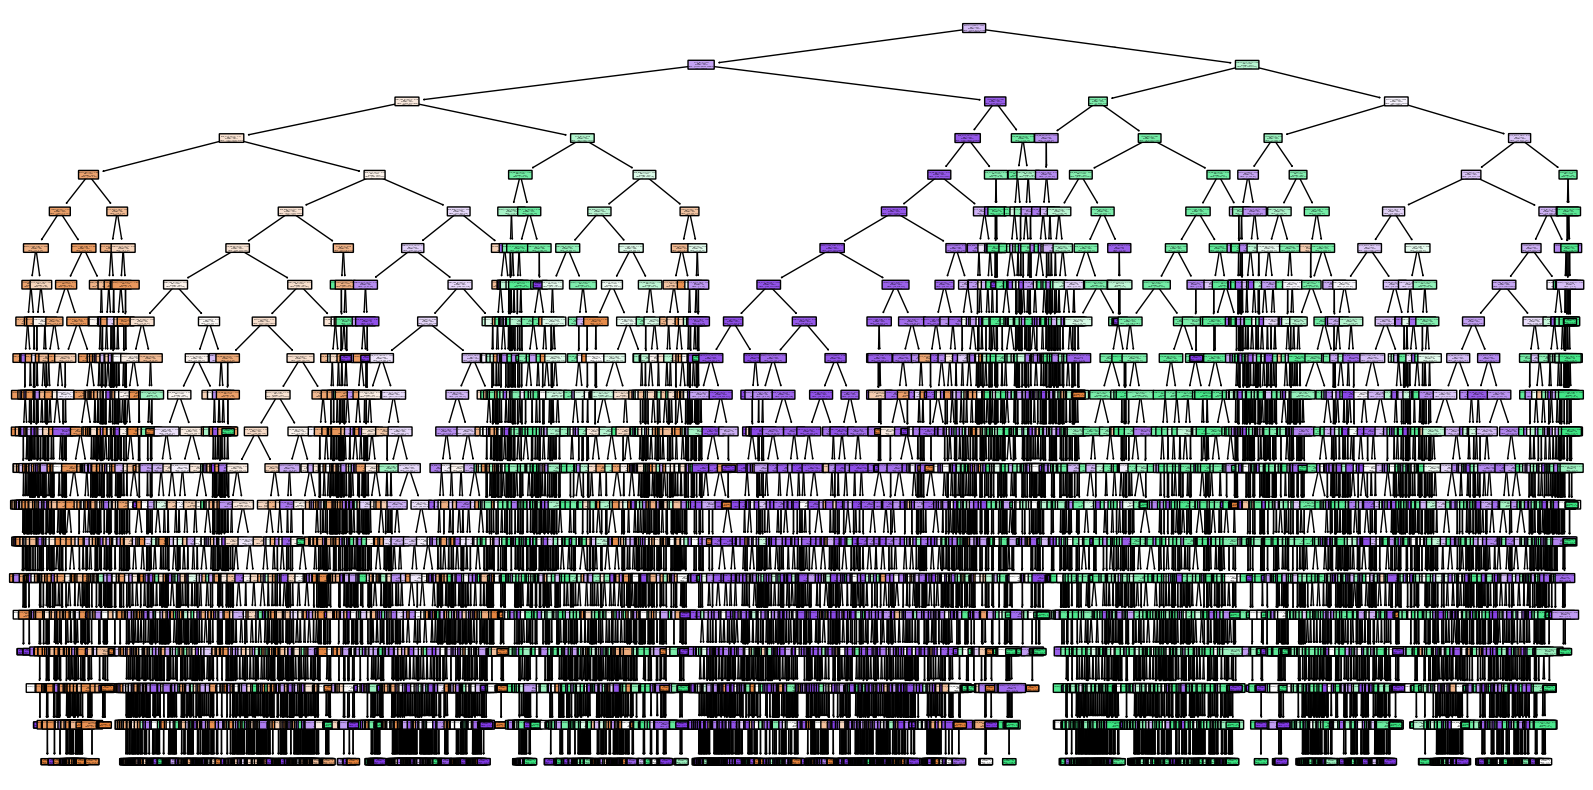

In [51]:
class_names = le.classes_ 
improvement_detected = any([
    accuracy_score(y_test, best_dt_selected.predict(X_test[selected_features])) > accuracy_score(y_test, best_dt.predict(X_test)),
    
    accuracy_score(y_test, best_rf_selected.predict(X_test[selected_rf_features])) > accuracy_score(y_test, best_rf.predict(X_test)),
    
    accuracy_score(y_test, best_knn_selected.predict(X_test[selected_knn_features])) > accuracy_score(y_test, best_knn.predict(X_test))
])

tree_to_plot = dt_common if improvement_detected else best_dt
feature_names_to_use = common_features if improvement_detected else X.columns

plt.figure(figsize=(20,10))
plot_tree(tree_to_plot,
          feature_names=feature_names_to_use,
          class_names=class_names,
          filled=True,
          rounded=True)
plt.show()


Сравнить лучшие модели KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier на тестовой выборке. Привести значения метрик *accuracy*, *precision*, *recall*, *f-measure*.

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }

if improvement_detected:
    test_data = X_test_common
    models = {
        'Decision Tree': dt_common,
        'Random Forest': rf_common,
        'KNN': knn_common
    }
else:
    test_data = X_test
    models = {
        'Decision Tree': best_dt,
        'Random Forest': best_rf,
        'KNN': best_knn
    }

results = []
for name, model in models.items():
    metrics = evaluate_model(model, test_data, y_test)
    metrics['Model'] = name
    results.append(metrics)

results_df = pd.DataFrame(results)[['Model', 'Accuracy', 'Precision', 'Recall', 'F1']]
print("\nСравнение лучших моделей на тестовой выборке:")
print(results_df.to_string(float_format="%.4f", index=False))


Сравнение лучших моделей на тестовой выборке:
        Model  Accuracy  Precision  Recall     F1
Decision Tree    0.7453     0.7469  0.7453 0.7458
Random Forest    0.8065     0.8069  0.8065 0.8065
          KNN    0.7851     0.7851  0.7851 0.7851
